#11.2 Pipeline Nonstream Tugas Individu

---
Nama : Iqbal Biondy
NIM  : 205150601111009
Kelas: Data Engineering-B



# Retrieve dataset from kaggle using API

Dataset yang digunakan adalah dataset statistik trending youtube video, dengan bentuk data adalah zip dan terdapat dataset trending dataset dari beberapa negara.

Untuk dataset yang saya gunakan adalah milik negara `United Stated (US)`

link dataset kaggle : https://raw.githubusercontent.com/yoga-sugitha/DataEngineering/main/kaggle.json

In [ ]:
!pip install -q kaggle
!wget https://raw.githubusercontent.com/yoga-sugitha/DataEngineering/main/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d datasnaek/youtube-new
!mkdir /content/youbue_new
!unzip youtube-new.zip -d youbue_new && rm youtube-new.zip

--2022-11-16 13:25:22--  https://raw.githubusercontent.com/yoga-sugitha/DataEngineering/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      62  --.-KB/s    in 0s      

2022-11-16 13:25:22 (2.73 MB/s) - ‘kaggle.json’ saved [62/62]

 98% 196M/201M [00:01<00:00, 166MB/s]
100% 201M/201M [00:01<00:00, 173MB/s]
Archive:  youtube-new.zip
  inflating: youbue_new/CA_category_id.json  
  inflating: youbue_new/CAvideos.csv  
  inflating: youbue_new/DE_category_id.json  
  inflating: youbue_new/DEvideos.csv  
  inflating: youbue_new/FR_category_id.json  
  inflating: youbue_new/FRvideos.csv  
  inflating: youbue_new/GB_category_id.json  
  inflating: youbue_new/GB

# Mempersiapkan Apache Spark di Collab

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 33.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=d5937d8ecbb69c693ce4e2abcbbf4dbaffea085d7d85e8c9d4c13f0c09f2a31f
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

--2022-11-16 13:26:49--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.1-bin-hadoop3.tgz’

spark-3.3.1-bin-had 100%[===================>] 285.48M   202MB/s    in 1.4s    

2022-11-16 13:26:51 (202 MB/s) - ‘spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]



In [ ]:
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import pandas as pd
import os
import findspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from datetime import datetime

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()

# extract dataset (`tap`) USvideos

In [ ]:
df_usvideos = spark.read.csv('/content/youbue_new/USvideos.csv', inferSchema=True,header=True)
df_usvideos.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



# load data (target)

In [ ]:
df_usvideos.coalesce(1).write.orc('usvideos_usage', mode='overwrite')

In [ ]:
dfUS = pd.read_orc('/content/usvideos_usage/part-00000-441e3214-f62b-470e-85ba-870e9cf8a442-c000.snappy.orc')
dfUS.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"""last week tonight trump presidency""|""last wee...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"""racist superman""|""rudy""|""mancuso""|""king""|""bac...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"""rhett and link""|""gmm""|""good mythical morning""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"""ryan""|""higa""|""higatv""|""nigahiga""|""i dare you""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"""ijustine""|""week with iPhone X""|""iphone x""|""ap...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"""SNL""|""Saturday Night Live""|""SNL Season 43""|""E...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"""5 Ice Cream Gadgets""|""Ice Cream""|""Cream Sandw...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"""Trailer""|""Hugh Jackman""|""Michelle Williams""|""...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"""vox.com""|""vox""|""explain""|""shift change""|""futu...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


# transform data

In [ ]:
df_usvideos = df_usvideos.drop('comments_disabled','ratings_disabled','video_error_or_removed','trending_date')
df_usvideos.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- description: string (nullable = true)



transform data `publish_time` dan `trending_date` into datetime format

In [ ]:
df_usvideos.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
from pyspark.sql.functions import *

In [ ]:
df_usvideos = df_usvideos.withColumn('publishtime',to_date('publish_time'))

In [ ]:
df_usvideos.show()

+-----------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+--------------------+-----------+
|   video_id|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|         description|publishtime|
+-----------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+--------------------+-----------+
|2kyS6SvSYSE|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|SHANTELL'S CHANNE...| 2017-11-13|
|1ZAPwfrtAFY|The Trump Preside...|     LastWeekTonight|         24|2017-11-13T07:30:...|"last week tonigh...|2418783| 97185|    6146|        12703|https://i.ytimg.c...|One year after th...| 20

In [ ]:
df_usvideos = df_usvideos.drop('publish_time')
df_usvideos.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- description: string (nullable = true)
 |-- publishtime: date (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
def strtoint (colold, colnew):
  df = df_usvideos.withColumn(colold, df_usvideos[colnew].cast(IntegerType()))
  return df

df_usvideos = strtoint('views','views')
df_usvideos = strtoint('likes','likes')
df_usvideos = strtoint('dislikes','dislikes')
df_usvideos = strtoint('comment_count','comment_count')

In [ ]:
df_usvideos.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- description: string (nullable = true)
 |-- publishtime: date (nullable = true)



In [ ]:
df_usvideos.groupBy('category_id').count().show()

+--------------------+-----+
|         category_id|count|
+--------------------+-----+
|                  15|  920|
|              artist|    5|
| informed reporti...|   39|
|                  29|   57|
| dining destinations|  151|
|                  22| 3210|
|                  28| 2401|
|             fashion|   32|
| no I'm not a les...|    4|
| and videos from ...|   40|
|                null| 6292|
|        moisturizers|    9|
|        John Goodman|    3|
|                  43|   57|
| how to do a 540°...|    6|
|                  27| 1656|
|                  17| 2174|
|                  26| 4146|
|          hairstyles|    8|
|  to kimchi and miso|   28|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#spark = SparkSession.builder.config('spark.jar','/usr/local/postgresql-42.2.5.jar').master("local").appName("PySpark_Postgres_test").getOrCreate()

# load to database

In [ ]:
pd_df = df_usvideos.toPandas()

In [ ]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48137 entries, 0 to 48136
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        48137 non-null  object 
 1   title           42235 non-null  object 
 2   channel_title   42112 non-null  object 
 3   category_id     41845 non-null  object 
 4   tags            41116 non-null  object 
 5   views           40949 non-null  float64
 6   likes           40949 non-null  float64
 7   dislikes        40949 non-null  float64
 8   comment_count   40949 non-null  float64
 9   thumbnail_link  41035 non-null  object 
 10  description     40390 non-null  object 
 11  publishtime     40949 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.4+ MB


# Rancangan Database

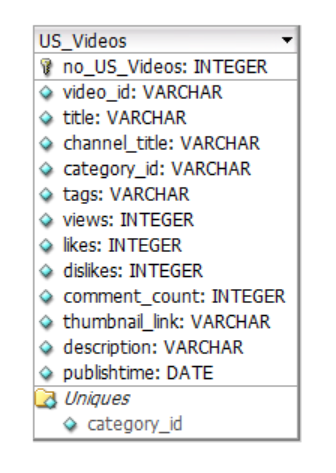

# create connection to database

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('us_db.db')
cur = con.cursor()
cur.execute(
    '''CREATE TABLE usVideos (
      video_id          VARCHAR,
      title             VARCHAR,
      channel_title     VARCHAR,
      category_id       VARCHAR,
      tags              VARCHAR,
      views             float,
      likes             float,
      dislikes          float,
      comment_count     float,
      thumbnail_link    TEXT,
      description       TEXT,
      publishtime       TEXT
    );'''
)
con.commit()
pd_df.to_sql('usVideos',con=con,if_exists='append',index=False)
con.close()

**Testing pararel processing**

In [ ]:
#import multi processing
import multiprocessing as mp
import requests
from multiprocessing.pool import ThreadPool as Pool

In [ ]:
sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://pyviz-tutorial.readthedocs.io/de/latest/', 33317)
('https://jupyter-tutorial.readthedocs.io/en/latest/', 74278)
('https://cusy.io/en', 30106)
('https://github.com/veit/pyviz-tutorial/', 190461)
('https://github.com/veit/jupyter-tutorial/', 219638)


There are 2 main objects in multiprocessing to implement parallel execution of a function: The Pool Class and the Process Class.

`Pool` Class

**Synchronous execution**

`Pool.map()` and `Pool.starmap()`
`Pool.apply()`

**Asynchronous execution**

`Pool.map_async()` and `Pool.starmap_async()`
Pool.apply_async())

`Process` Class